In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [133]:
# check the shape of data, the last column "response" needs to be predicted
train.shape, test.shape

((381109, 12), (127037, 11))

In [135]:
# Drop id column
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [137]:
# check if there is null value in dataset
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [138]:
test.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [139]:
# Exploratory Data Analysis
train.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


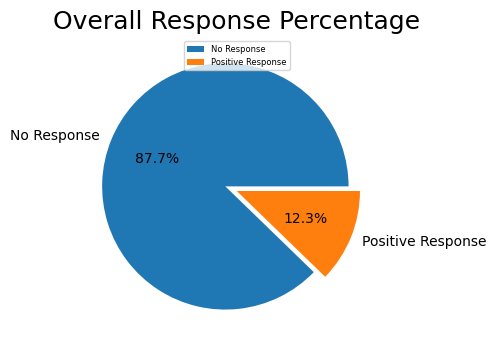

In [140]:
# Response percentage in train dataset
response_cnt = train.Response.value_counts()

plt.figure(figsize = (4,4))
plt.pie(response_cnt, labels = ['No Response', 'Positive Response'], explode = (0.1, 0), autopct='%0.1f%%')
plt.title('Overall Response Percentage', fontsize=18)
plt.legend(loc='upper center', fontsize=6)
plt.show()

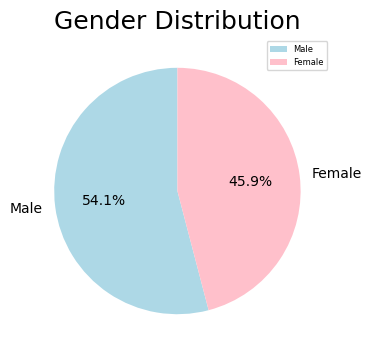

In [141]:
# Gender count in train dataset
gender_cnt = train['Gender'].value_counts()

plt.figure(figsize = (4,4))
plt.pie(gender_cnt, labels = ['Male', 'Female'], colors=['lightblue', 'pink'], startangle=90, autopct='%0.1f%%')
plt.title('Gender Distribution', fontsize=18)
plt.legend(loc='upper right', fontsize=6)
plt.show()

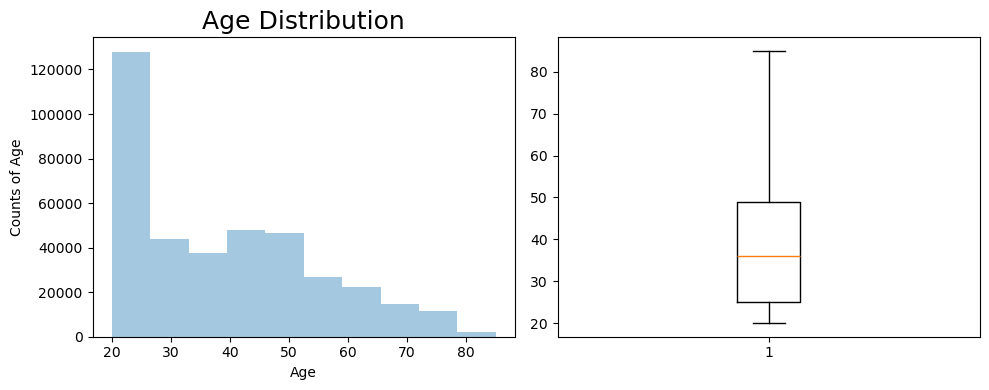

In [142]:
# Age distribution
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4), tight_layout=True)
ax[0].hist(train['Age'], bins=10, alpha=0.4)
ax[1].boxplot(train['Age'])
ax[0].set_title('Age Distribution', fontsize=18)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Counts of Age')
plt.show()

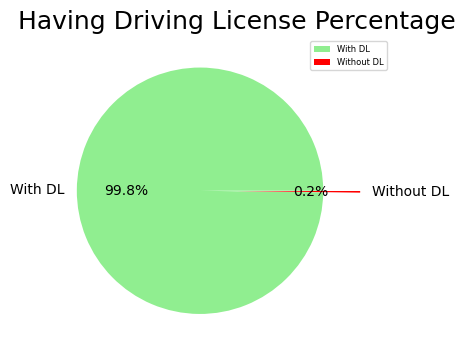

In [143]:
DL_cnt = train['Driving_License'].value_counts()

plt.figure(figsize = (4,4))
plt.pie(DL_cnt, labels = ['With DL', 'Without DL'], colors=['lightgreen', 'red'], explode = (0.3, 0), autopct='%0.1f%%')
plt.title('Having Driving License Percentage', fontsize=18)
plt.legend(loc='upper right', fontsize=6)
plt.show()

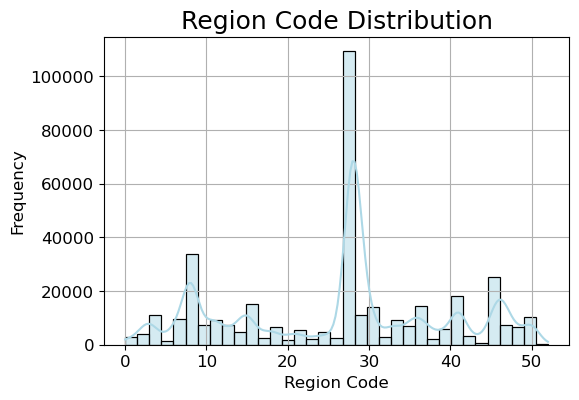

In [144]:
plt.figure(figsize=(6, 4))  
sns.histplot(train['Region_Code'], bins=35, kde=True, color='lightblue', edgecolor='black')
plt.title('Region Code Distribution', fontsize=18)  
plt.xlabel('Region Code', fontsize=12)  
plt.ylabel('Frequency', fontsize=12)  
plt.xticks(fontsize=12)   
plt.yticks(fontsize=12)   
plt.grid(True)
plt.show()

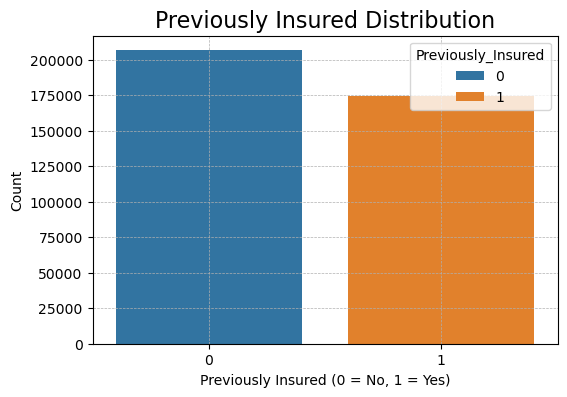

In [145]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Previously_Insured', data=train, hue='Previously_Insured')
plt.title('Previously Insured Distribution', fontsize=16)
plt.xlabel('Previously Insured (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

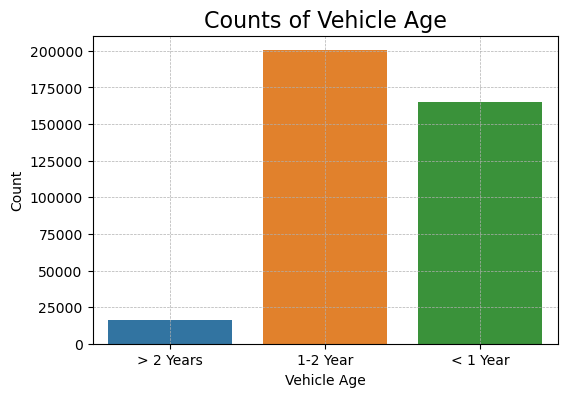

In [146]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Vehicle_Age', data=train, hue='Vehicle_Age')
plt.title('Counts of Vehicle Age', fontsize=16)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

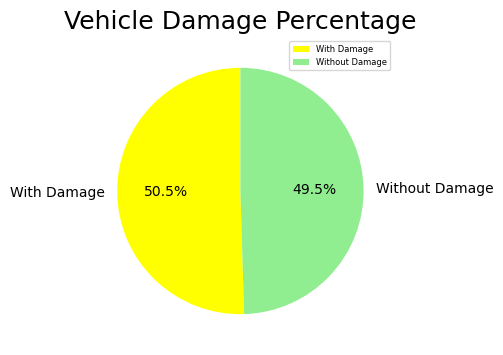

In [147]:
vd_cnt = train['Vehicle_Damage'].value_counts()

plt.figure(figsize = (4,4))
plt.pie(vd_cnt, labels = ['With Damage', 'Without Damage'], startangle=90, colors=['yellow', 'lightgreen'], autopct='%0.1f%%')
plt.title('Vehicle Damage Percentage', fontsize=18)
plt.legend(loc='upper right', fontsize=6)
plt.show()

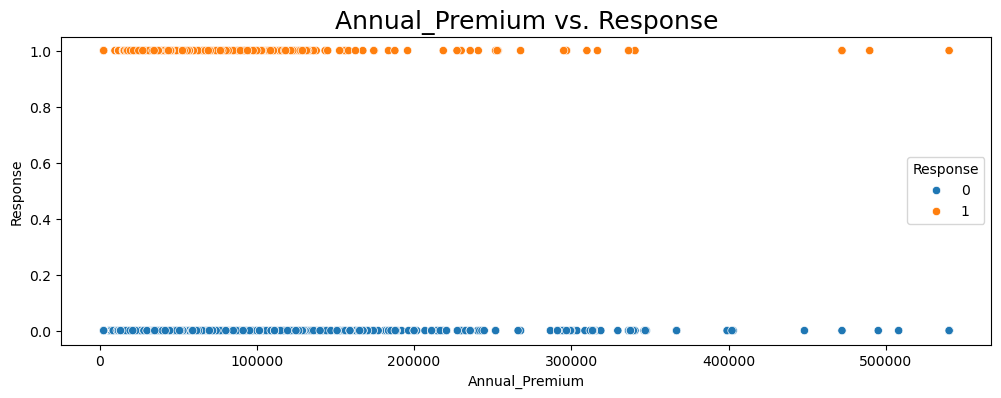

In [148]:
plt.figure(figsize = (12,4))
sns.scatterplot(data=train, x='Annual_Premium', y='Response', hue='Response')
plt.title('Annual_Premium vs. Response', fontsize=18)
plt.show()

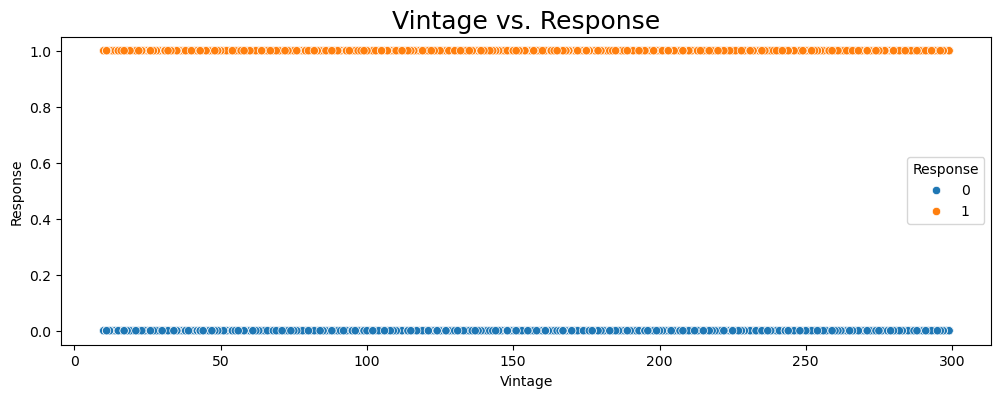

In [149]:
plt.figure(figsize = (12,4))
sns.scatterplot(data=train, x='Vintage', y='Response', hue='Response')
plt.title('Vintage vs. Response', fontsize=18)
plt.show()

In [151]:
# mapping cat varibles into numerical val
va_vd = { 'Gender': {'Male':1, 'Female':0},
        'Vehicle_Age': {'< 1 Year':1, '1-2 Year':1.5, '> 2 Years':2},
       'Vehicle_Damage': {'Yes':1, 'No':0}}
train = train.replace(va_vd)
test = test.replace(va_vd)
test.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1.0,0,35786.0,152.0,53
1,1,40,1,28.0,0,1.5,1,33762.0,7.0,111
2,1,47,1,28.0,0,1.5,1,40050.0,124.0,199
3,1,24,1,27.0,1,1.0,1,37356.0,152.0,187
4,1,27,1,28.0,1,1.0,0,59097.0,152.0,297


In [102]:
num_col = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']
cat_col = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage']

In [152]:
train[num_col].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


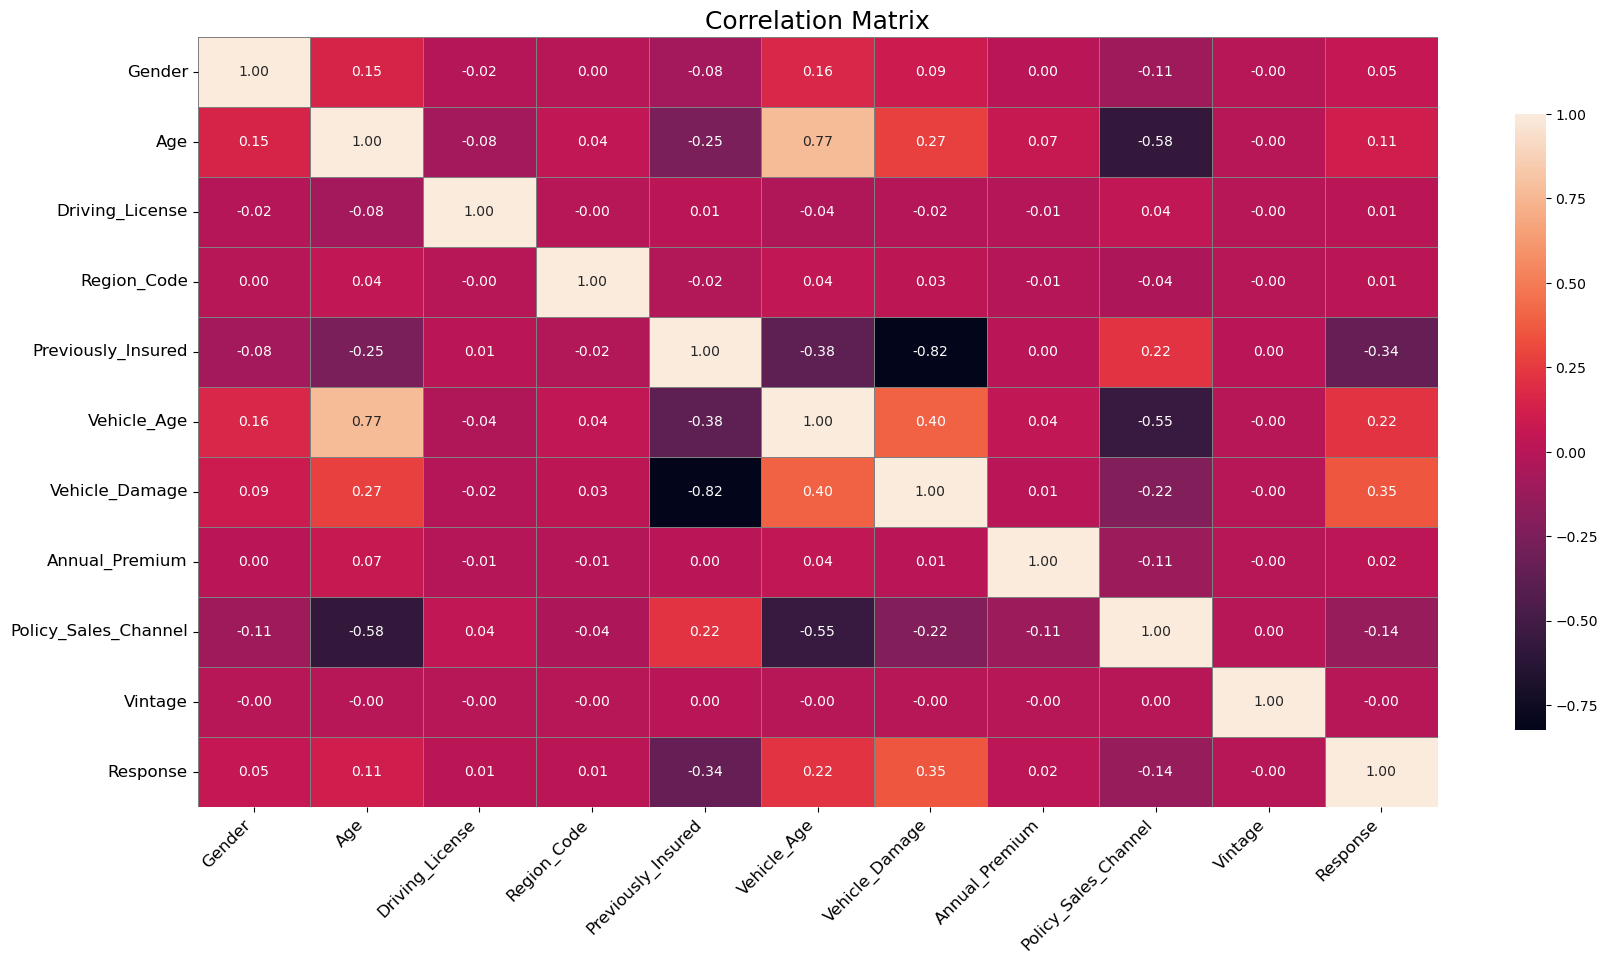

In [153]:
correlation_matrix = train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

Observation from above EDA process

Age vs. Vehicle_Age: There is a strong negative correlation (-0.5377), indicating that as age increases, the age of the vehicle tends to decrease. This makes sense as older individuals may prefer newer vehicles.

Previously_Insured vs. Vehicle_Damage: There is a strong negative correlation (-0.8362), suggesting that individuals who have not previously been insured are more likely to have vehicle damage. This makes intuitive sense since insured individuals might be more cautious about vehicle maintenance.

Policy_Sales_Channel vs. Channel_Vintage: There is a strong positive correlation (0.6673), indicating that certain policy sales channels are associated with longer customer vintage. This suggests that specific sales channels are successful in retaining customers over time.

Previously_Insured vs. Response: There is a moderate negative correlation (-0.3459), indicating that individuals who are previously insured are less likely to respond positively to insurance offers. This could be due to perceived redundancy or satisfaction with current coverage.

Vehicle_Damage vs. Response: There is a moderate positive correlation (0.3598), suggesting that individuals with vehicle damage are more likely to respond positively to insurance offers. This implies that damaged vehicles might prompt individuals to seek additional or improved insurance coverage.

*build binary classfication model & evaluation*

In [154]:
train.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age             float64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [155]:
X = train.drop(['Response'], axis=1).copy()
y = train['Response'].copy()

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
import gc

In [157]:
import warnings 
warnings.filterwarnings("ignore")

In [158]:
# Scaling Data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X)

In [159]:
# try Logistic Regression Model

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [176]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [177]:
y_pred = LR.predict(x_test)

In [181]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy_Score of LR model on testing Data is:",accuracy)

Accuracy_Score of LR model on testing Data is: 0.8763436628095126


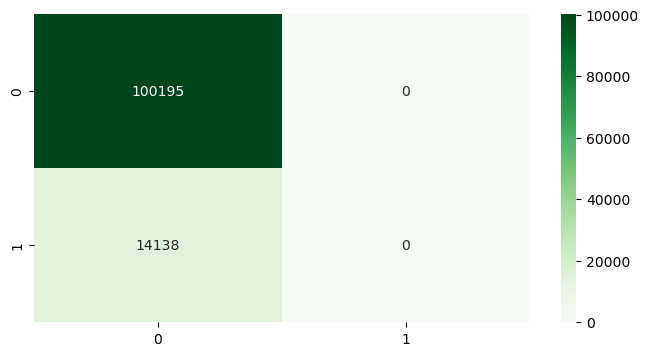

In [182]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="g",cmap="Greens")
plt.show()

In [162]:
# try XGBOOST model
train_X = x_train.to_numpy()
train_y = y_train.to_numpy()
test_X = x_test.to_numpy()
test_y = y_test.to_numpy()

In [163]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.03,  # Reduced learning rate
    'alpha': 0.1,  # Slightly reduced regularization
    'subsample': 0.851,  # Increased subsample fraction
    'colsample_bytree': 0.45,  # Adjusted colsample_bytree
    'max_depth': 12,  # Reduced max depth
    'min_child_weight': 10,  # Slightly increased to control overfitting
    'gamma': 1e-6,  # Slightly increased gamma
    'random_state': 42,
    'max_bin': 100,  # Reduced max_bin from 50000
    'enable_categorical': True,
    'n_estimators': 100,  # Keep high for early stopping
    'tree_method': 'hist',
    'early_stopping_rounds':50,
    'verbose':50
}
gc.collect()
model = XGBClassifier(**params,device="cuda")
XGB = model.fit(
    train_X, 
    train_y, 
    eval_set=[(test_X, test_y)]    
)

[0]	validation_0-auc:0.81622
[1]	validation_0-auc:0.84893
[2]	validation_0-auc:0.84689
[3]	validation_0-auc:0.85030
[4]	validation_0-auc:0.85176
[5]	validation_0-auc:0.85238
[6]	validation_0-auc:0.85259
[7]	validation_0-auc:0.85356
[8]	validation_0-auc:0.85306
[9]	validation_0-auc:0.85346
[10]	validation_0-auc:0.85341
[11]	validation_0-auc:0.85386
[12]	validation_0-auc:0.85422
[13]	validation_0-auc:0.85407
[14]	validation_0-auc:0.85459
[15]	validation_0-auc:0.85486
[16]	validation_0-auc:0.85441
[17]	validation_0-auc:0.85457
[18]	validation_0-auc:0.85451
[19]	validation_0-auc:0.85403
[20]	validation_0-auc:0.85426
[21]	validation_0-auc:0.85419
[22]	validation_0-auc:0.85411
[23]	validation_0-auc:0.85429
[24]	validation_0-auc:0.85425
[25]	validation_0-auc:0.85457
[26]	validation_0-auc:0.85463
[27]	validation_0-auc:0.85494
[28]	validation_0-auc:0.85515
[29]	validation_0-auc:0.85544
[30]	validation_0-auc:0.85541
[31]	validation_0-auc:0.85557
[32]	validation_0-auc:0.85559
[33]	validation_0-au

In [165]:
prediction = XGB.predict(test_X)

In [166]:
print("Best iteration:", model.best_iteration)

Best iteration: 98


In [167]:
val_pred_prob = XGB.predict_proba(test_X)[:, 1]
auc = roc_auc_score(test_y, val_pred_prob)
print(f"Validation AUC: {auc:.5f}")

Validation AUC: 0.85749


In [168]:
test = test.to_numpy()
test_pred_prob = XGB.predict_proba(test)[:, 1]

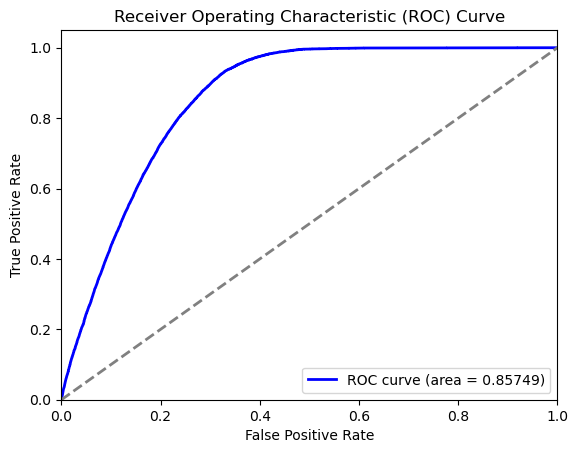

In [169]:
fpr, tpr, thresholds = roc_curve(test_y, val_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.5f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

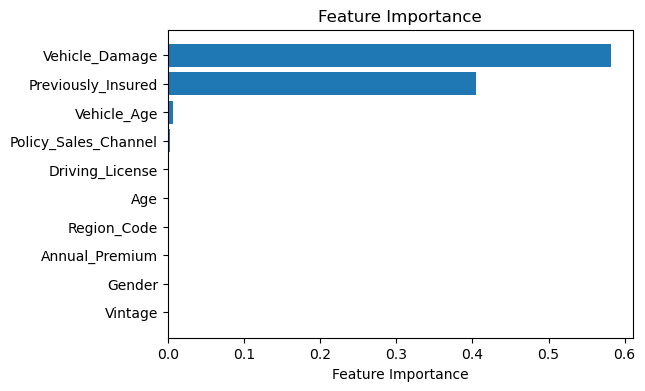

In [172]:
plt.figure(figsize=(6, 4))
importance = model.feature_importances_
sorted_idx = np.argsort(importance)
plt.barh(range(len(importance)), importance[sorted_idx], align='center')
plt.yticks(range(len(importance)), [train.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

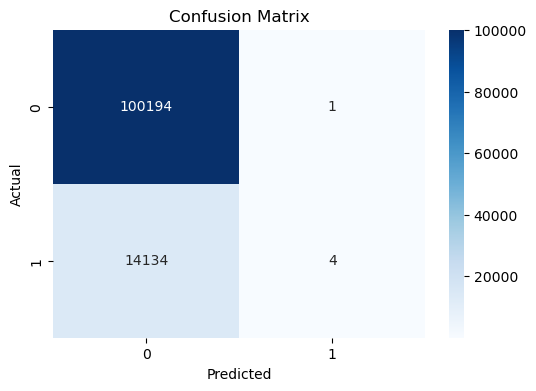

In [173]:
cm = confusion_matrix(test_y, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

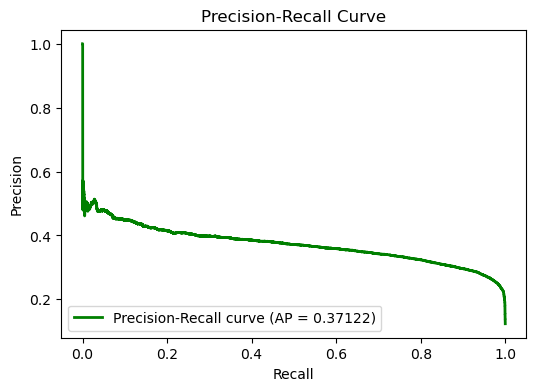

In [183]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(test_y, val_pred_prob)
average_precision = average_precision_score(test_y, val_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.5f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
